## Using SVM i  bulid and train a model to classify cells to wheather the sample belongs to benign(mild state) or  malignant(evil state)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv("/content/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [13]:
df.size

7689

In [14]:
df.shape

(699, 11)

In [15]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [16]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### Distribution of classes

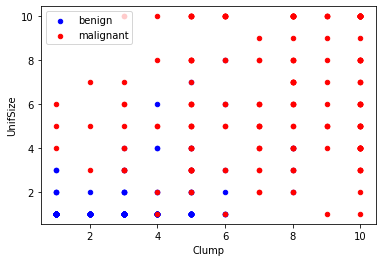

In [22]:
benign_df=df[df['Class']==2][0:200]
malignant_df=df[df['Class']==4][0:200]
axes=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='malignant',ax=axes)
plt.show()

## identified unwanted rows

## first we check that if we have a nan value then we have to remove it

In [33]:
df['BareNuc'].isnull().sum()

0

In [34]:
df = df.dropna()

In [35]:
df['BareNuc'].isnull().sum()

0

here we have BareNuc cloum which in not in numeric so we have to convert into numeric

In [38]:
df.dtypes
df['BareNuc']=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')

In [39]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## remove unwanted cloum we select only relative columns

In [40]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [43]:
feature_df=df[['Clump','UnifSize','UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x=np.asarray(feature_df)
y=np.asarray(df['Class'])

## Divide the dataset into train and test

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

## Modeling SVM

In [53]:
from sklearn import svm
classifier= svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)


SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
y_predict=classifier.predict(x_test)

In [64]:
y_predict

array([2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2])

## Evaluation(Result)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(  y_test,y_predict))

              precision    recall  f1-score   support

           2       0.69      0.94      0.79        90
           4       0.62      0.17      0.27        47

    accuracy                           0.68       137
   macro avg       0.65      0.56      0.53       137
weighted avg       0.66      0.68      0.61       137

